# MIE1622 Computational Finance and Risk Management

## Assignment 4 - Asset Pricing

### Jialin Shang 1005086256


In [3]:
# Import libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [5]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (np.log(S0/K) + (r + (sigma**2)/2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * (np.sqrt(T-t))
    c = S0 * norm.cdf(d1) - norm.cdf(d2) * K * (np.exp(-r * (T-t)))
    p = K * norm.cdf(-d2) * (np.exp(-r * (T-t))) - S0 * norm.cdf(-d1)
    
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    # delta_t is the time increment
    dt = T / numSteps
    # initial price of paths
    paths[0] = [S0]*numPaths

    for i in range(numPaths):
        for j in range(numSteps):
            # using GBM
            paths[j+1,i] = paths[j,i]*np.exp((mu-0.5*sigma**2)*dt + sigma * np.sqrt(dt)*np.random.normal(0,1))
    
    c_payoff_T = np.zeros((numPaths,1))
    p_payoff_T = np.zeros((numPaths,1))

    # calculate payoff for each path and then discount it back 
    for i in range(numPaths):
        #for call, payoff only if the exercise price is less than the spot price 
        c_payoff_T[i] = np.maximum(paths[numSteps,i]-K,0)*np.exp(-r*T)
        #for put, payoff only if the exercise price is larger than the spot price 
        p_payoff_T[i] = np.maximum(K - paths[numSteps,i],0)*np.exp(-r*T)
      
    c = np.mean(c_payoff_T)
    p = np.mean(p_payoff_T)
    return c, p, paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1,numPaths))
    # delta_t is the time increment
    dt = T / numSteps
    # initial price of paths
    paths[0] = [S0]*numPaths

    for i in range(numPaths):
        for j in range(numSteps):
            # using GBM
            paths[j+1,i] = paths[j,i]*np.exp((mu-0.5*sigma**2)*dt + sigma * np.sqrt(dt)*np.random.normal(0,1))
    
    c_payoff_T = np.zeros((numPaths,1))
    p_payoff_T = np.zeros((numPaths,1))
    buffer = np.zeros((numPaths,1))

    # calculate payoff for each path and then discount it back 
    for i in range(numPaths):
        # the option becomes a standard European option if the barrier was crossed some time before expiration, otherwise the payoff is zero
        buffer[i] = np.sum(paths[:,i]>=Sb)
        if buffer[i] > 0:
            #for call, payoff only if the exercise price is less than the spot price 
            c_payoff_T[i] = np.maximum(paths[numSteps,i]-K,0)*np.exp(-r*T)
            #for put, payoff only if the exercise price is larger than the spot price 
            p_payoff_T[i] = np.maximum(K - paths[numSteps,i],0)*np.exp(-r*T)
        else:
            c_payoff_T[i] = 0
            p_payoff_T[i] = 0

    c = np.mean(c_payoff_T)
    p = np.mean(p_payoff_T)
    return c, p

In [6]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10
numPaths = 1000000

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
  BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_path_one_step = \
  MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_path_multi_step = \
  MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.026169740447838
One-step MC price of an European put option is 7.901327428315977
Multi-step MC price of an European call option is 8.013823721974935
Multi-step MC price of an European put option is 7.90075700070325
One-step MC price of an Barrier call option is 7.8135531888389185
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.954831658330355
Multi-step MC price of an Barrier put option is 1.1957392542445908


### One-Step Monte Carlo Simulation

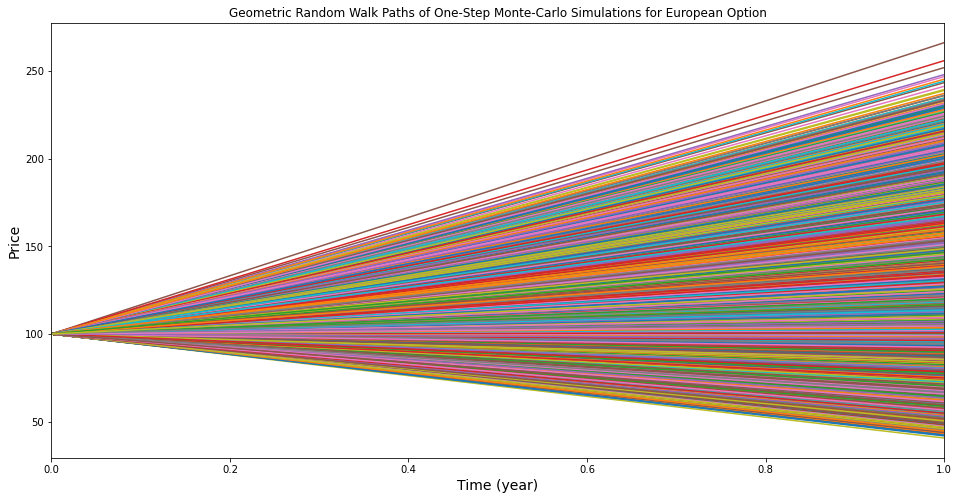

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(MC_path_one_step[:, 0 : -1])
plt.xlim([0, 1])
plt.title("Geometric Random Walk Paths of One-Step Monte-Carlo Simulations for European Option")
plt.ylabel("Price", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.show()

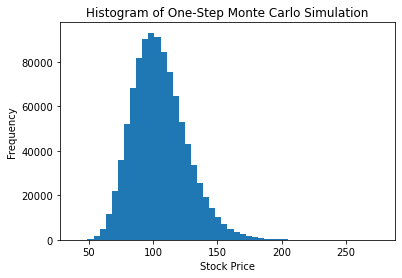

In [8]:
# Run the one-step Monte Carlo simulation
_, _, MC_path_one_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Get the final stock prices at the end of the simulation
final_prices = MC_path_one_step[-1, :]

# Create a histogram of the final stock prices
plt.hist(final_prices, bins=50)
plt.title("Histogram of One-Step Monte Carlo Simulation")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

### Multi-Step Monte Carlo Simulation

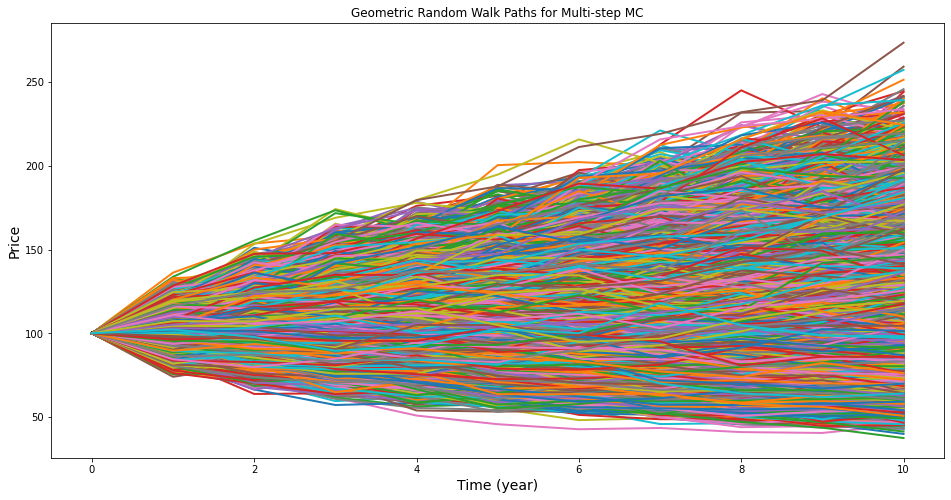

In [10]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize = (16,8))
[plt.plot(MC_path_multi_step[:,i], linewidth = 2) for i in range(numPaths)]
plt.ylabel("Price", fontsize = 14)
plt.xlabel("Time (year)", fontsize = 14)
plt.title('Geometric Random Walk Paths for Multi-step MC')
plt.show()

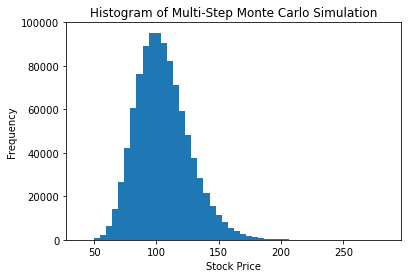

In [11]:
# Run the one-step Monte Carlo simulation
_, _, MC_path_multi_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Get the final stock prices at the end of the simulation
final_prices = MC_path_multi_step[-1, :]

# Create a histogram of the final stock prices
plt.hist(final_prices, bins = 50)
plt.title("Histogram of Multi-Step Monte Carlo Simulation")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()

In [12]:
# one-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_1_stepin, putMC_Barrier_Knockin_Price_1_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_multi_stepin, putMC_Barrier_Knockin_Price_multi_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# one-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_stepde, putMC_Barrier_Knockin_Price_1_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_multi_stepde, putMC_Barrier_Knockin_Price_multi_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepin)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepin)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepin)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepin)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepde)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepde)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepde)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepde))



One-step MC price of an Barrier call option with volatility increased by 10% is 8.645385129089684
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.762857512657272
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.5028059022710099
One-step MC price of an Barrier call option with volatility decreased by 10% is 7.000956650429781
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.133921454556993
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9153822565697064


In [14]:
paths_list = [10, 100, 1000, 5000, 10000, 1000000]
call_BS_European_Price, put_BS_European_Price = BS_european_price(S0, K, T, r, sigma)
residual_call_optimal, residual_put_optimal = 0.01, 0.01

for num_path in paths_list:
    callMC_optimal_step, putMC_optimal_step, MC_optimal_paths = MC_european_price(S0, K, T, r, mu, sigma, 1, num_path)
    
    call_residual = abs(callMC_optimal_step - call_BS_European_Price)
    if call_residual < residual_call_optimal:
        residual_call_optimal = call_residual
        num_path_call_optimal = num_path
        callMC_optimal = callMC_optimal_step
        
    
    put_residual = abs(putMC_optimal_step - put_BS_European_Price)
    if put_residual < residual_put_optimal:
        residual_put_optimal = put_residual
        num_path_put_optimal = num_path
        putMC_optimal = putMC_optimal_step

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(put_BS_European_Price))
print('Optimal MC price of an European call option is ' + str(callMC_optimal)) 
print('Optimal MC price of an European put option is ' + str(putMC_optimal)) 
print('Optimal Number of Path is ' + str(num_path_call_optimal)) 

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
Optimal MC price of an European call option is 8.020187588043289
Optimal MC price of an European put option is 7.895308062475373
Optimal Number of Path is 1000000
